In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

import pandas as pd

In [35]:
deci=3

sns.set(style='whitegrid')
#color_codes=True
#"whitegrid"  "dark"  "ticks"  "white"

data="Data_dd.xlsx"
df = pd.read_excel(data)

df.dropna(inplace=True)
df.reset_index(drop=True, inplace = True)


df.head()

,Hue,DX,DY
0,Shift@Mainline,0.1800,0.048
1,SM,0.0619,0.047
2,SM,0.1570,-0.148
3,SM,0.1320,-0.095
4,SM,0.0830,0.010


In [36]:
#Change value to numetic format

for i in df: 
    try:
        df[i]=df[i].apply(lambda r:float(r))
    except:
        continue

In [37]:
h1=df.columns[0]

In [38]:
df.groupby(h1).count()

,DX,DY
Hue,,
SM,283,283
Shift@Mainline,8,8


In [39]:
df.groupby(h1).mean()

,DX,DY
Hue,,
SM,0.140728,0.086608
Shift@Mainline,0.135500,-0.030500


In [40]:
df.groupby(h1).std()

,DX,DY
Hue,,
SM,0.103517,0.145086
Shift@Mainline,0.079014,0.127786


In [41]:
stdd=df.groupby(h1).std()
stdd.reset_index(inplace=True)
stdd

,Hue,DX,DY
0,SM,0.103517,0.145086
1,Shift@Mainline,0.079014,0.127786


In [42]:
stdd

,Hue,DX,DY
0,SM,0.103517,0.145086
1,Shift@Mainline,0.079014,0.127786


In [43]:
df[h1].unique()[0]

'Shift@Mainline'

In [44]:
config = df[h1].unique()[0]

ddf = df[df[h1]==config]

In [45]:
ddf.max()

Hue    Shift@Mainline
DX              0.231
DY              0.103
dtype: object

In [46]:
ddf.min()

Hue    Shift@Mainline
DX              0.024
DY             -0.281
dtype: object

Shift@Mainline


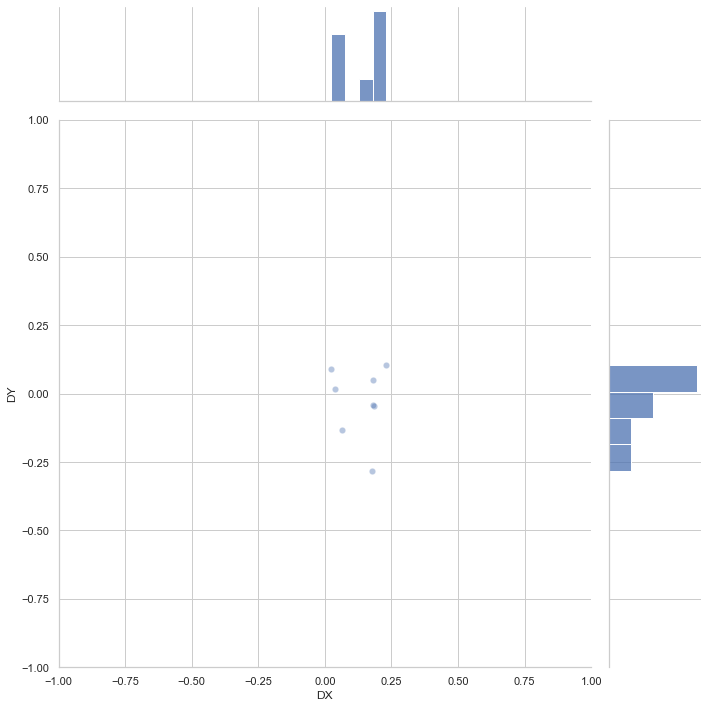

In [47]:
fig_size=(30, 30)

w= sns.jointplot(data=ddf,x='DX',y='DY',
                 xlim=(-1,1),ylim=(-1,1),
                 height=10,s=40,alpha=0.4,kind='scatter'
                 )#hue_order=['#HSG','#Mainline'],,hue='Line',
print(config)

Shift@Mainline


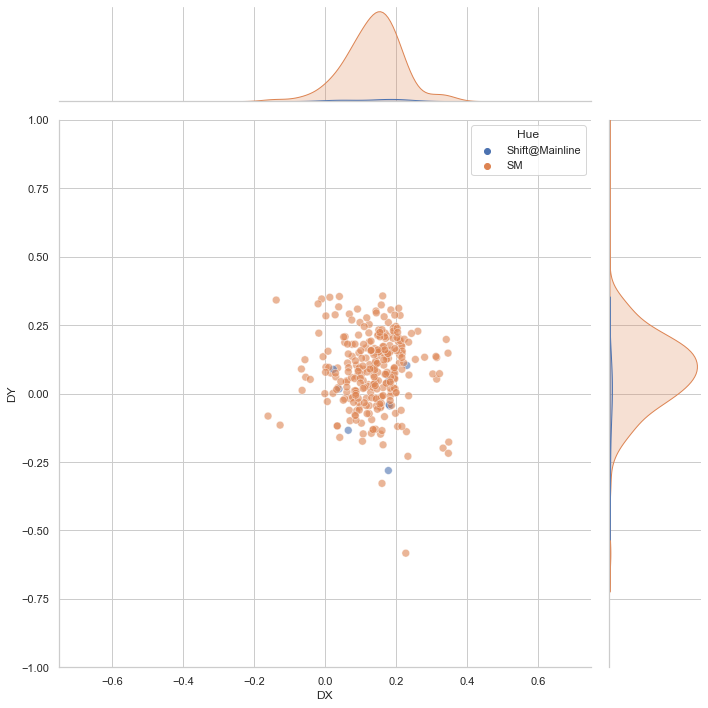

In [52]:
fig_size=(30, 30)

w= sns.jointplot(data=df,x='DX',y='DY',
                 xlim=(-0.75,0.75),ylim=(-1,1),
                 height=10,s=60,alpha=0.6,kind='scatter',hue='Hue',hue_order=['Shift@Mainline','SM']
                 )#,,hue='Line',
print(config)

In [16]:
def ticks(LL, UL, step):
    lst=[round(i*step,4)+LL for i in range(0,int((UL-LL)/step+0.5))]
    lst.append(UL)
    return lst

In [17]:
set(df[list(df)[0]])

{'LYT', 'SWY'}

In [18]:
df

,Clip,DX,DY
0,SWY,-0.123,0.092
1,SWY,0.014,-0.065
2,SWY,0.113,-0.048
3,SWY,-0.216,-0.010
4,SWY,0.117,-0.191
...,...,...,...
605,LYT,0.018,-0.119
606,SWY,0.061,-0.159
607,LYT,0.041,-0.153
608,SWY,0.097,-0.073


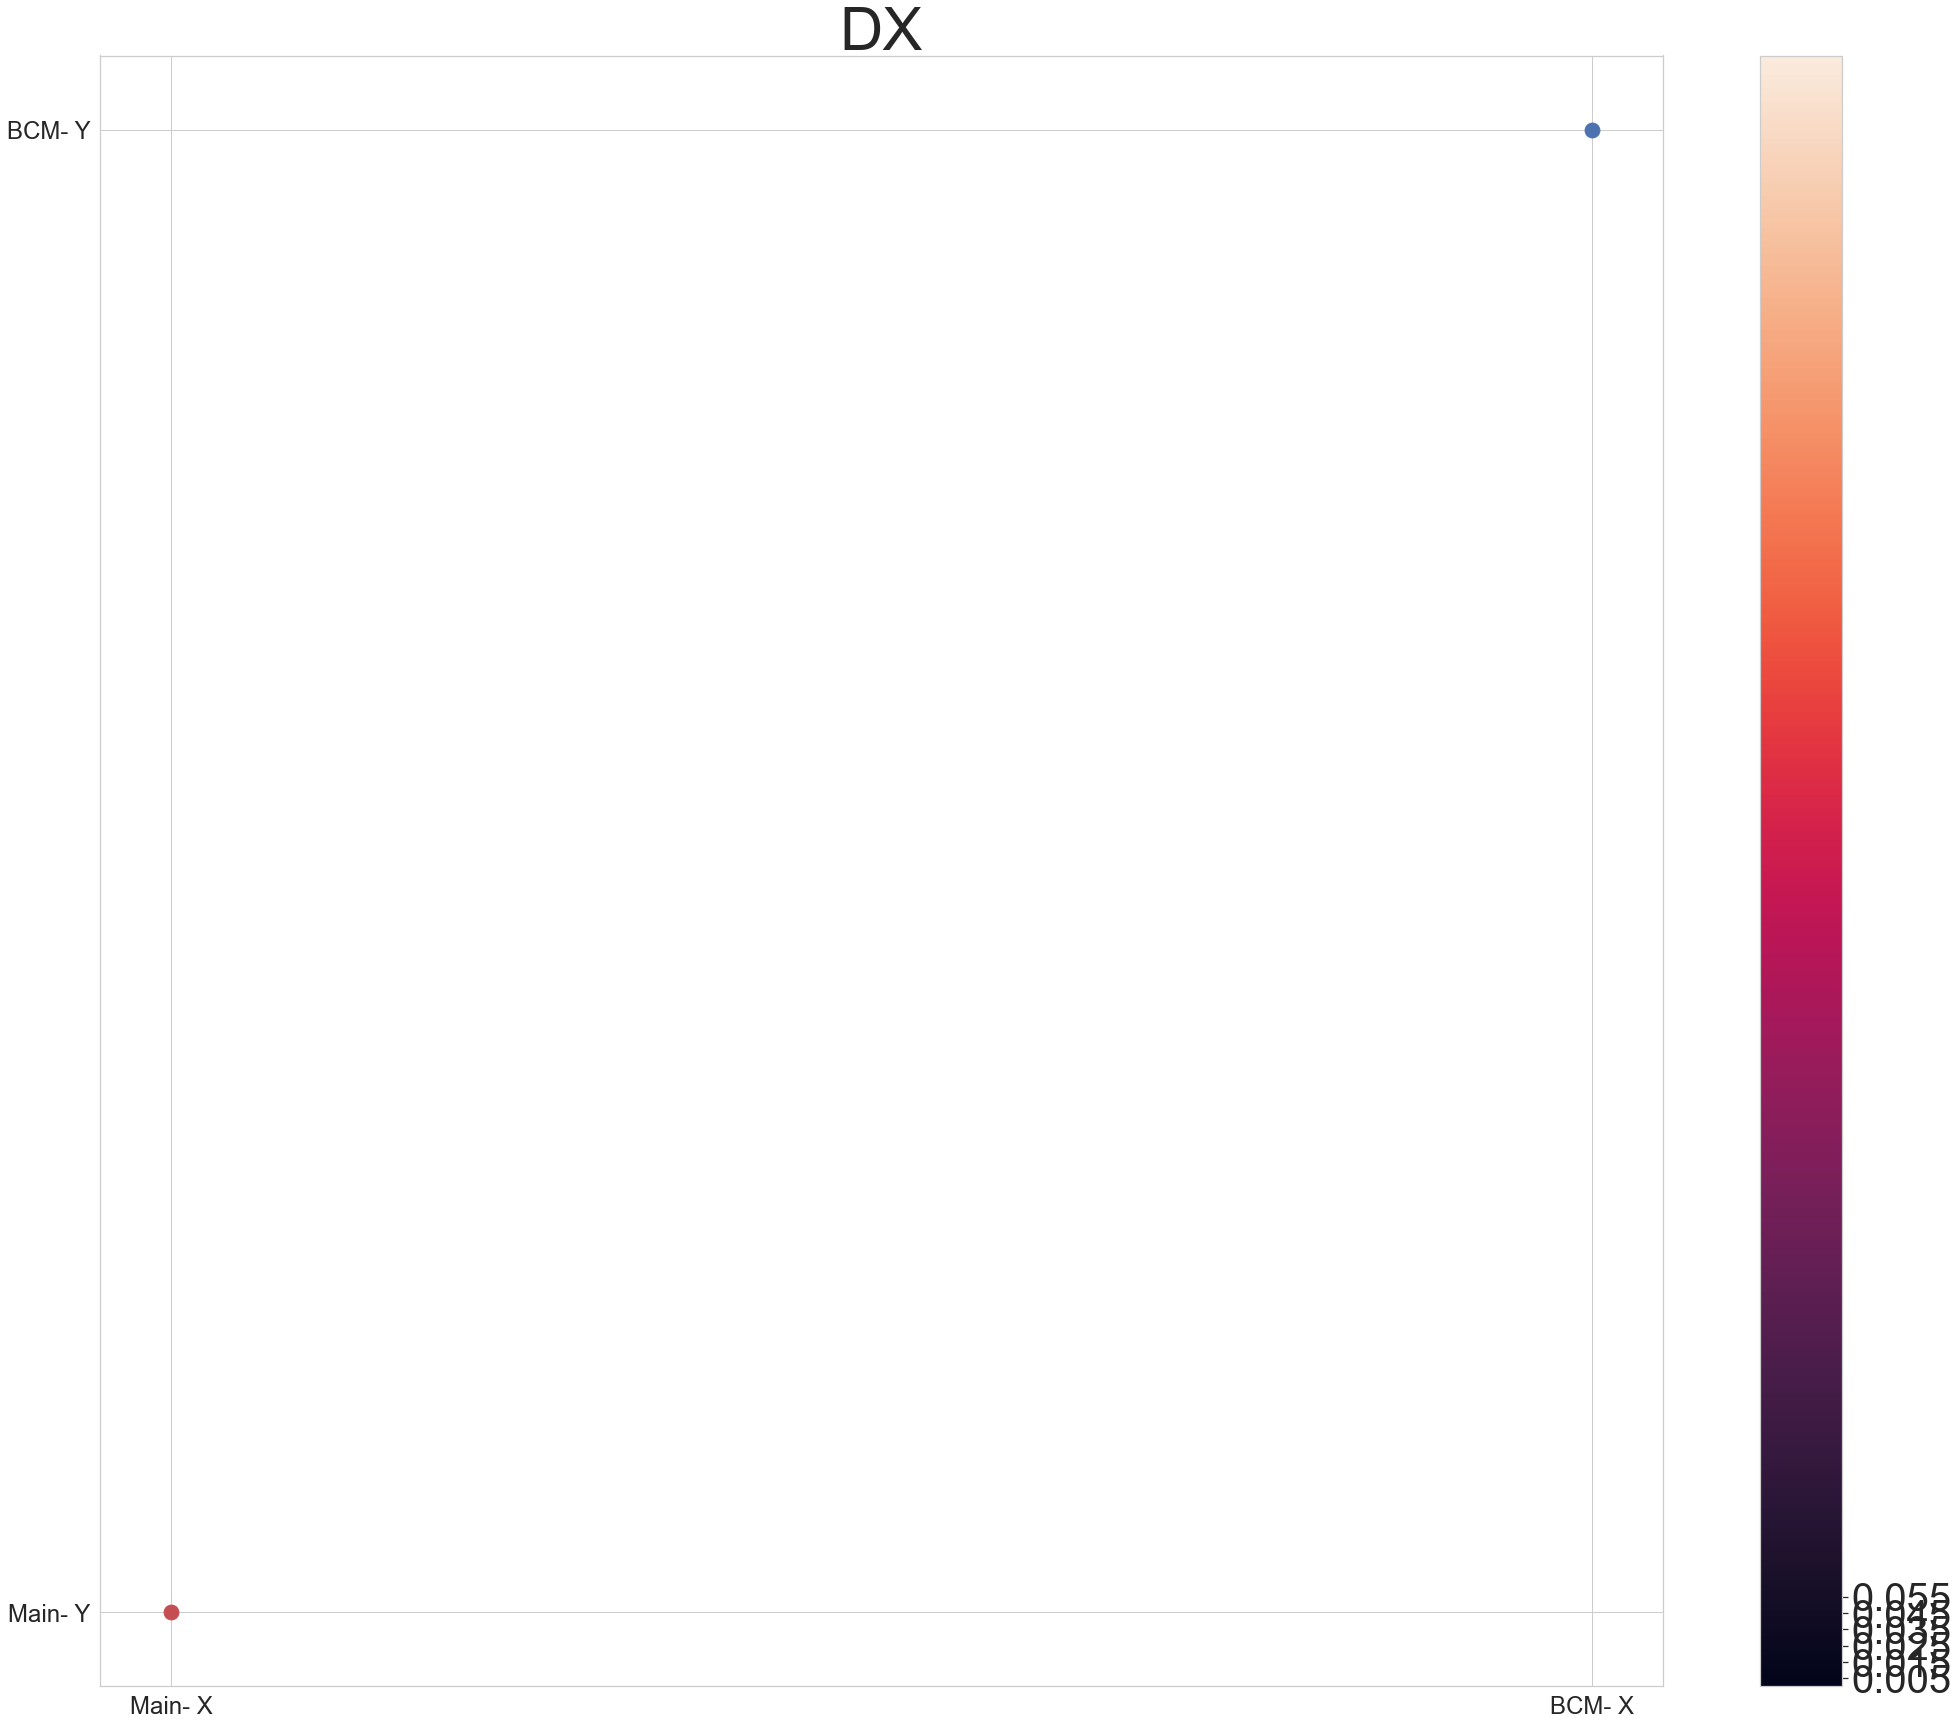

In [19]:
import pylab as pl
plt.figure(figsize=(35,30))

#Heat Map
#w=sns.scatterplot(data=df,x=list(df)[1],y=list(df)[2],c=df['Delta'],s=1000,cmap='coolwarm',vmin=-0.075,vmax=0.075,)
#pl.scatter(data=df,x="X",y="Y",s=220,cmap='coolwarm',vmin=-0.055,vmax=0.055,c=df['Z1'])#
pl.scatter(data=ddf,x="Main- X",y="Main- Y",s=220,c='r')#
pl.scatter(data=ddf,x="BCM- X",y="BCM- Y",s=220,c='b')#

#One Data
#w=sns.scatterplot(data=df,x=list(df)[5],y=list(df)[6],s=200)

#two data
#pal='flare'
#w=sns.scatterplot(data=df,x=list(df)[1],y=list(df)[2],hue=list(df)[0],s=500,palette=pal)


plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('',fontsize=30)
plt.ylabel('',fontsize=30)

#w.set(yticks=ticks(-30,30,1))
#w.set(xticks=ticks(-25,25,1))
#w.set(ylim=(-30,30))
#w.legend(fontsize=24)#,loc='upper left',ncol=1,bbox_to_anchor=(1.01, 1)

#w.axhline(0.0, ls='--', color="b",lw=4)

plt.title(list(df)[1],fontsize=60)

#pl.scatter(x, y, c=z)
#pl.colorbar()

cb = plt.colorbar()
cb.set_ticks(ticks(-0.055,0.055,0.01))
cb.ax.tick_params(labelsize=40)

#plt.yticks(fontsize=10,ticks=ticks(-25,25,5))
#plt.xticks(fontsize=10,ticks=ticks(-25,25,5))

#w.legend(fontsize=24,loc='upper right',ncol=1,)   #


